In [1]:
from functools import partial

import torch

def quad(a, b, c, x):
    return a * x * x + b * x + c

def make_quad(a, b, c):
    return partial(quad, a, b, c)

def add_noise(x):
    return x + torch.randn_like(x)

def plot_abc(abc, color: str = 'red'):
    f = make_quad(*abc)
    x = torch.linspace(-2, -2, 20)
    plt.grid()
    plt.plot(x, f(x), color=color)

Text(0.5, 1.0, 'MAE: 0.91214')

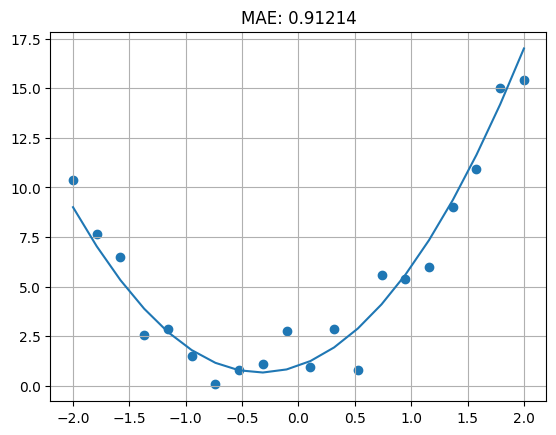

In [2]:
from matplotlib import pyplot as plt

f = make_quad(3, 2, 1)
x = torch.linspace(-2, 2, 20)
model_preds = f(x)
input_labels = add_noise(model_preds)
plt.grid()
plt.scatter(x, input_labels)
plt.plot(x, model_preds)
mae = torch.abs(model_preds - input_labels).mean()
plt.title(f'MAE: {mae:.5f}')

<function matplotlib.pyplot.grid(visible: 'bool | None' = None, which: "Literal['major', 'minor', 'both']" = 'major', axis: "Literal['both', 'x', 'y']" = 'both', **kwargs) -> 'None'>

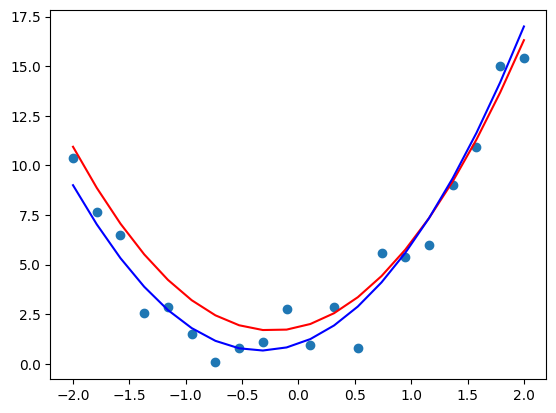

In [3]:
abc = torch.tensor([1.1, 1.1, 1.1], requires_grad=True, dtype=torch.float64)

for e in range(0, 5):
    mae = torch.abs(make_quad(*abc)(x) - input_labels).mean()
    mae.backward()
    with torch.no_grad():
        abc -= abc.grad * 0.1
        # abc.grad.zero_() ??

abc = abc.detach()
pred_fun = make_quad(*abc)
y_pred = pred_fun(x)
plt.plot(x, y_pred, color='red')
plt.plot(x, model_preds, color='blue')
plt.scatter(x, input_labels)
plt.grid